# **Warehouse_and_Retail_Sales**

In this project, I will be preformaing an unsupervised clustering of data on the customer's records from a warehouse and retail sales database. Customer segmention is practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customer into segments to optimize the significance of each customer to the business.To modify products according to distinct needs and behaviours of the customers.It also helps the business to cater to conerns of different types of customers.

#1.Basic Libraries and Import Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [74]:
ex=pd.read_csv('/content/drive/MyDrive/Internship Project/Project 04/next_process.csv')
ex.head()

,Unnamed: 0,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
0,0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2,BOOTLEG RED,750ML,750.0 ML,750 ML,0,0,0
1,1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4,MOMENT DE PLAISIR,750ML,750.0 ML,750 ML,0,0,0
2,2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1,S SMITH ORGANIC PEAR CIDER,18.7OZ,18.7 OZ,18.7 OZ,0,0,0
3,3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1,SCHLINK HAUS KABINETT,750ML,750.0 ML,750 ML,0,0,0
4,4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,1,0,0,SANTORINI GAVALA WHITE,750ML,750.0 ML,750 ML,0,0,0


In [75]:
ex.drop(columns=['Unnamed: 0','ITEM DESCRIPTION','QUANTITY','STD UNIT','NUMBER UNIT'],inplace=True)

In [76]:
cop=ex.copy()

In [77]:
cop['ITEM TYPE'].value_counts()

,count
ITEM TYPE,
WINE,187640
LIQUOR,64910
BEER,42413
KEGS,10146
NON-ALCOHOL,1909
STR_SUPPLIES,405
REF,127
DUNNAGE,95


In [78]:
#One hot encoding using OneHotEncoder of Scikit-Learn
categorical_columns= cop.select_dtypes(include=['object']).columns.tolist()
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded= encoder.fit_transform(cop[['ITEM TYPE']])

In [79]:
one_hot_cop=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(['ITEM TYPE']))
cop_encoded=pd.concat([cop,one_hot_cop],axis=1)

In [80]:
cop_encoded=cop_encoded.drop(columns=['ITEM TYPE'],axis=1)
cop_encoded.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,0,0,2,BOOTLEG RED,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020,1,PWSWN INC,100024,0,1,4,MOMENT DE PLAISIR,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,0,0,1,S SMITH ORGANIC PEAR CIDER,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,0,0,1,SCHLINK HAUS KABINETT,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,1,0,0,SANTORINI GAVALA WHITE,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
#One hot encoding with many categorical
cop_encoded['BRAND NAME'].value_counts().sort_values(ascending=False).head(20)

,count
BRAND NAME,
MD 20,183
BACARDI RUM GOLD,169
JIM BEAM WHITE,155
NEW AMSTERDAM VODKA,150
EVOLUTION LOT,149
SMIRNOFF VODKA,147
ABSOLUT VODKA,144
GILBEY S VODKA,144
JACK DANIELS BLACK,144


In [82]:
top_10=[cop_encoded['BRAND NAME'].value_counts().sort_values(ascending=False).head(20).head(10).index]
top_10

[Index(['MD 20', 'BACARDI RUM GOLD', 'JIM BEAM WHITE', 'NEW AMSTERDAM VODKA',
        'EVOLUTION LOT', 'SMIRNOFF VODKA', 'ABSOLUT VODKA', 'GILBEY S VODKA',
        'JACK DANIELS BLACK', 'REMY MARTIN VSOP'],
       dtype='object', name='BRAND NAME')]

In [83]:
#One hot encoding with many categorical
cop_encoded['SUPPLIER'].value_counts().sort_values(ascending=False).head(20)

,count
SUPPLIER,
REPUBLIC NATIONAL DISTRIBUTING CO,20995
LEGENDS LTD,13634
SOUTHERN GLAZERS WINE AND SPIRITS,11720
E & J GALLO WINERY,10816
"THE COUNTRY VINTNER, LLC DBA WINEBOW",10669
MONSIEUR TOUTON SELECTION,10360
A VINTNERS SELECTIONS,9994
BACCHUS IMPORTERS LTD,9150
DIAGEO NORTH AMERICA INC,7520


In [84]:
top_10_supplier=[cop_encoded['SUPPLIER'].value_counts().sort_values(ascending=False).head(20).head(10).index]
top_10_supplier

[Index(['REPUBLIC NATIONAL DISTRIBUTING CO', 'LEGENDS LTD',
        'SOUTHERN GLAZERS WINE AND SPIRITS', 'E & J GALLO WINERY',
        'THE COUNTRY VINTNER, LLC DBA WINEBOW', 'MONSIEUR TOUTON SELECTION',
        'A VINTNERS SELECTIONS', 'BACCHUS IMPORTERS LTD',
        'DIAGEO NORTH AMERICA INC', 'RELIABLE CHURCHILL LLLP'],
       dtype='object', name='SUPPLIER')]

In [85]:
def one_hot_top_x(df,variable,top_x_labels):
  for label in top_x_labels:
    df[variable+'_'+label]=np.where(df[variable]==label,1,0)

In [86]:
# encode "BRAND NAME" into top_10 most frequent categories
one_hot_top_x(cop_encoded,'BRAND NAME',top_10[0])

In [87]:
one_hot_top_x(cop_encoded,'SUPPLIER',top_10_supplier[0])

In [88]:
cop_encoded.drop(columns=['BRAND NAME','SUPPLIER'],inplace=True)

In [89]:
cop_encoded.head()

,YEAR,MONTH,ITEM CODE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN,ITEM TYPE_BEER,...,SUPPLIER_REPUBLIC NATIONAL DISTRIBUTING CO,SUPPLIER_LEGENDS LTD,SUPPLIER_SOUTHERN GLAZERS WINE AND SPIRITS,SUPPLIER_E & J GALLO WINERY,"SUPPLIER_THE COUNTRY VINTNER, LLC DBA WINEBOW",SUPPLIER_MONSIEUR TOUTON SELECTION,SUPPLIER_A VINTNERS SELECTIONS,SUPPLIER_BACCHUS IMPORTERS LTD,SUPPLIER_DIAGEO NORTH AMERICA INC,SUPPLIER_RELIABLE CHURCHILL LLLP
0,2020,1,100009,0,0,2,0,0,0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2020,1,100024,0,1,4,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2020,1,1001,0,0,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2020,1,100145,0,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1,100293,1,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
cop_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 37 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   YEAR                                           307645 non-null  int64  
 1   MONTH                                          307645 non-null  int64  
 2   ITEM CODE                                      307645 non-null  int64  
 3   RETAIL SALES                                   307645 non-null  int64  
 4   RETAIL TRANSFERS                               307645 non-null  int64  
 5   WAREHOUSE SALES                                307645 non-null  int64  
 6   WAREHOUSE DISPATCH UNITS                       307645 non-null  int64  
 7   RETURN                                         307645 non-null  int64  
 8   TRANSFERS RETURN                               307645 non-null  int64  
 9   ITEM TYPE_BEER                       

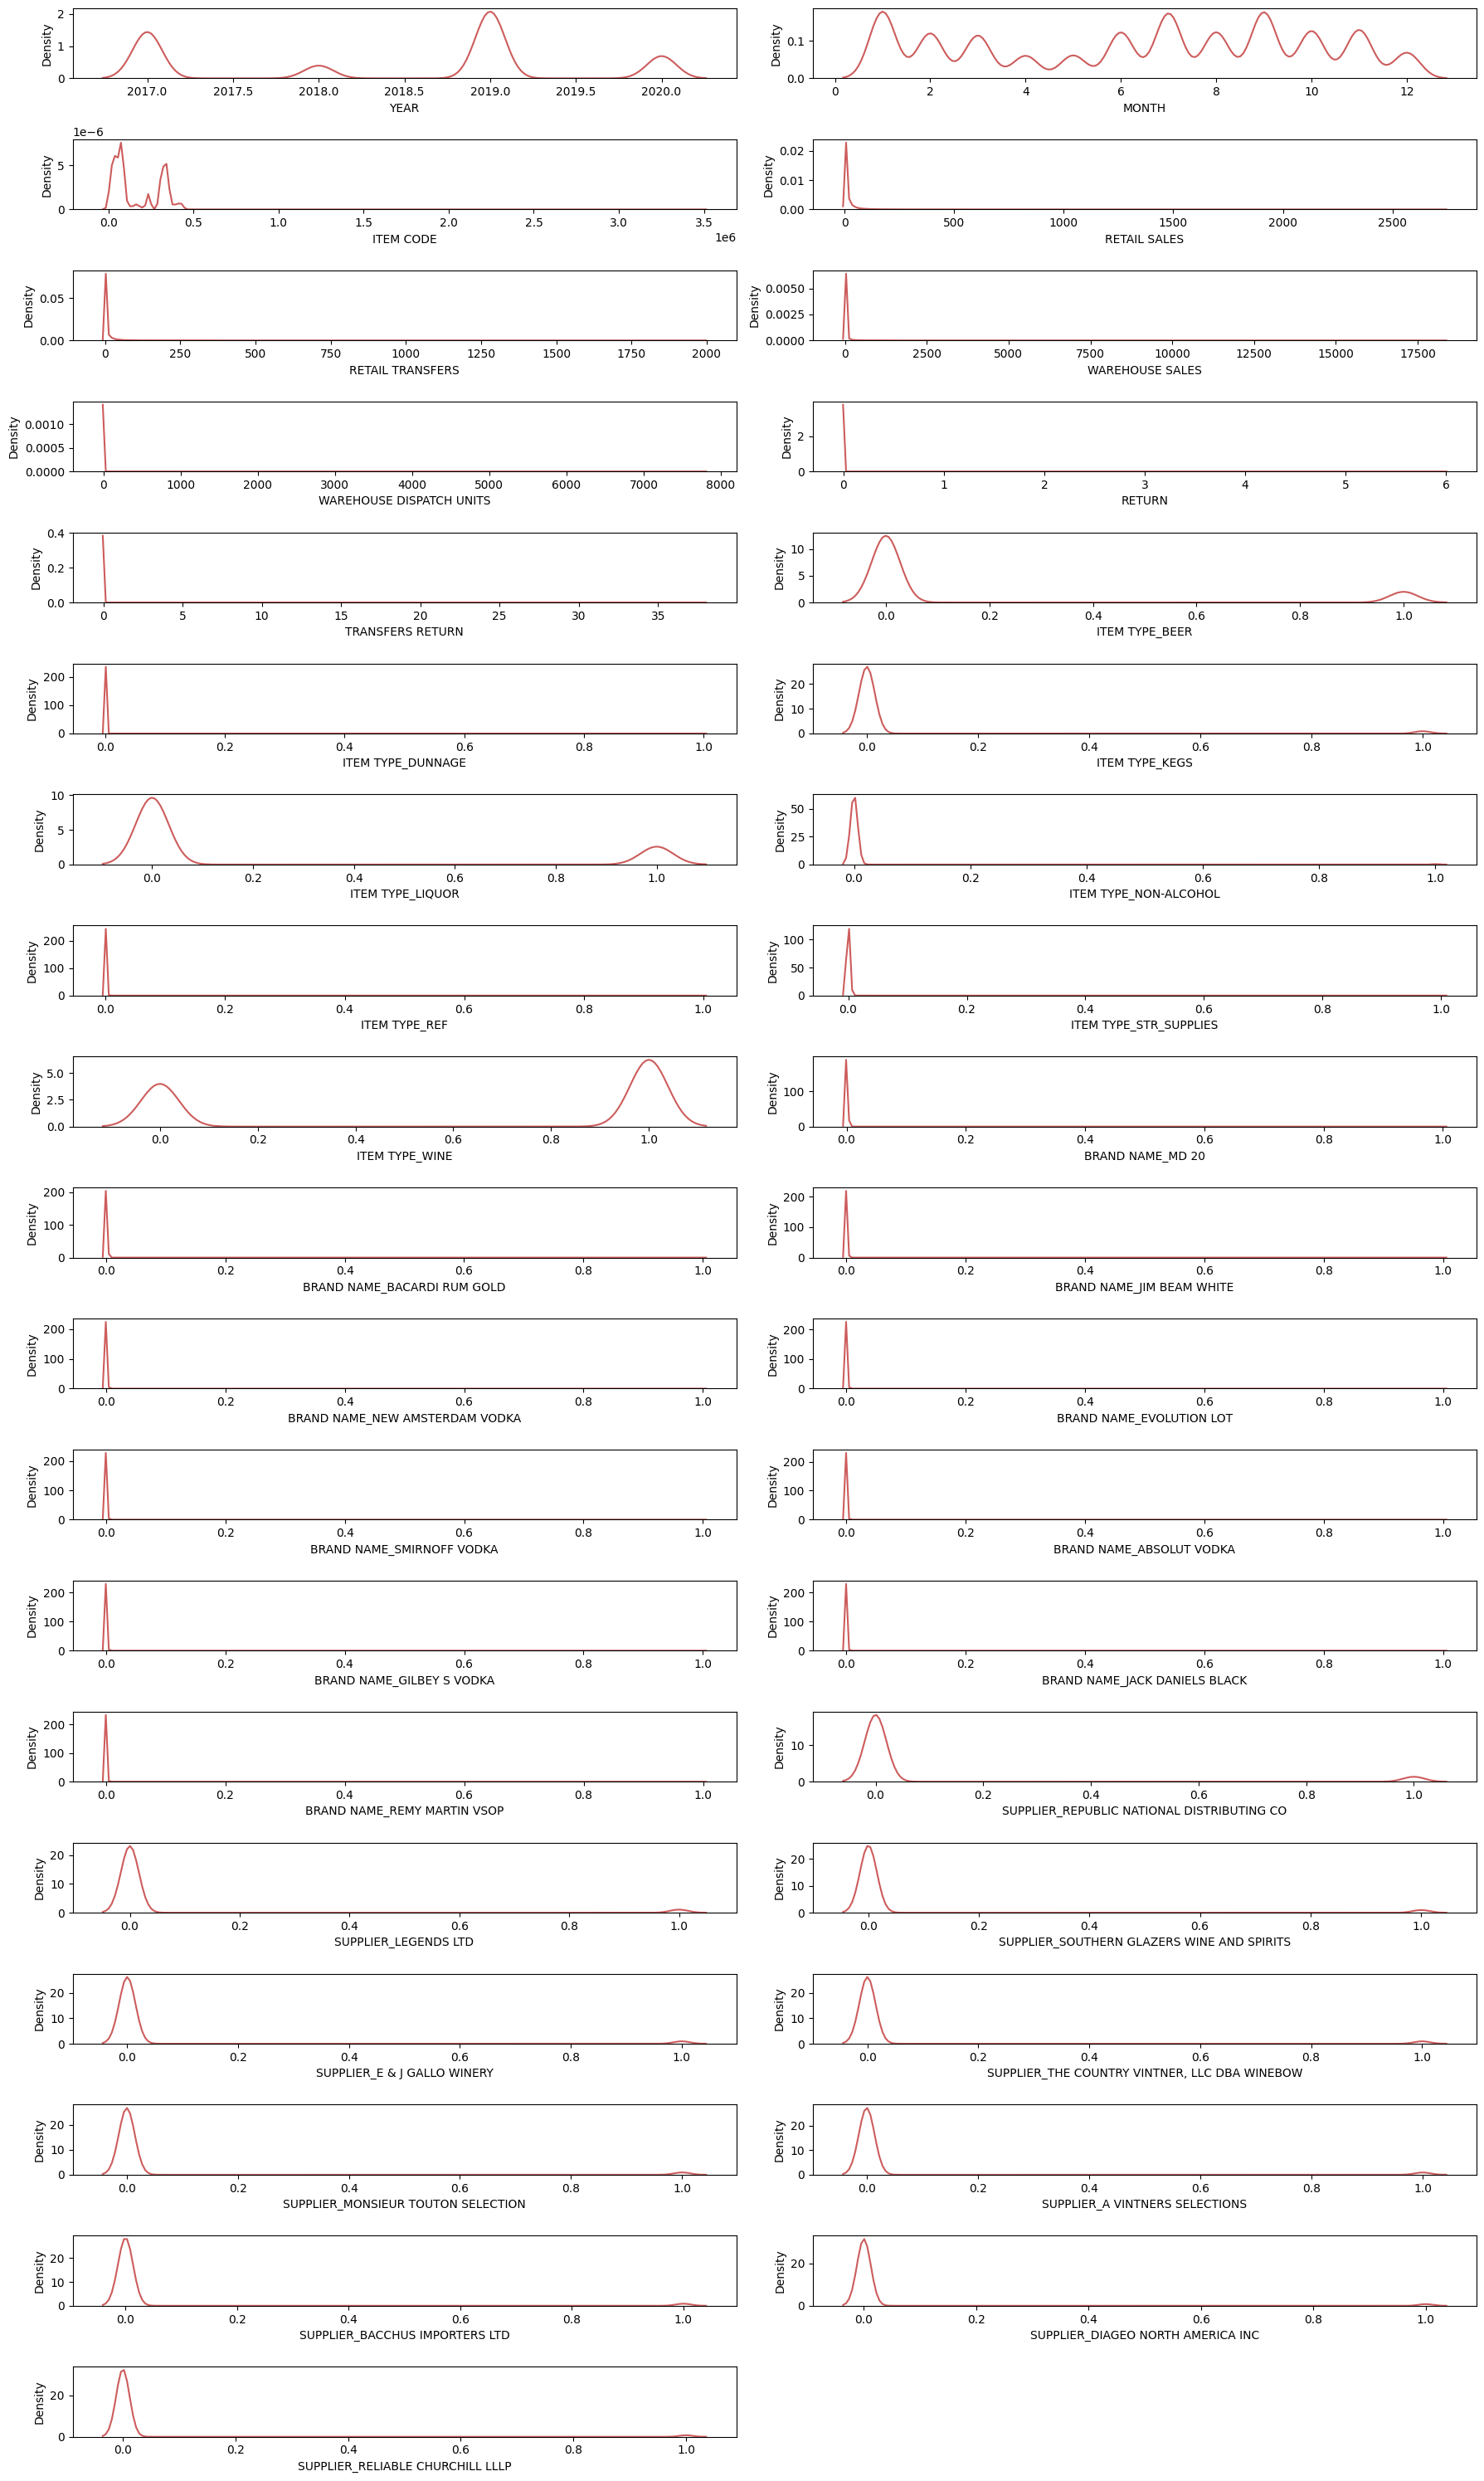

In [91]:
# distribution of data before scaling
plt.figure(figsize=(18, 30))

num_cols = cop_encoded.shape[1]
num_rows = int(np.ceil(num_cols / 2))

for i, col in enumerate(cop_encoded):
    plt.subplot(num_rows, 2, i+1) # Use calculated num_rows
    sns.kdeplot(x=cop_encoded[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()
#plt.savefig('before_scaling.png')
plt.show()
#files.download('before_scaling.png')

In [92]:
ex=cop_encoded

In [93]:
ex.isnull().sum()

,0
YEAR,0
MONTH,0
ITEM CODE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
WAREHOUSE DISPATCH UNITS,0
RETURN,0
TRANSFERS RETURN,0
ITEM TYPE_BEER,0


##Dimensionality Reduction

In [94]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer()

# Fit and transform the data
ex_imputed = imputer.fit_transform(ex)

# Now apply PCA to the imputed data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(ex_imputed)  # Apply PCA to the imputed data
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.99996546e-01 3.29623296e-06 8.25174599e-08]


#2. Machine Learning Models

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np

cluster_range = range(2, 11)
scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(ex)
    score = calinski_harabasz_score(ex, labels)
    scores.append(score)
    print(f"Calinski-Harabasz Score for K={k}: {score}")

# Identify the best K
best_k = cluster_range[np.argmax(scores)]
print(f"The best number of clusters is: {best_k}")


Calinski-Harabasz Score for K=2: 3106223.238716827
Calinski-Harabasz Score for K=3: 2863945.864854315
Calinski-Harabasz Score for K=4: 2980487.149869704
Calinski-Harabasz Score for K=5: 3911328.979475561
Calinski-Harabasz Score for K=6: 3648804.649541843
Calinski-Harabasz Score for K=7: 4149174.508756669
Calinski-Harabasz Score for K=8: 4929603.072615857
Calinski-Harabasz Score for K=9: 5634117.619578767
Calinski-Harabasz Score for K=10: 5524430.021740425
The best number of clusters is: 9


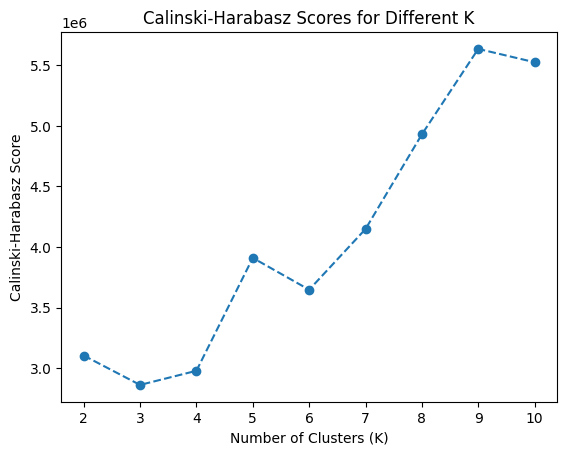

In [118]:
plt.plot(cluster_range,scores, marker='o', linestyle='--')
plt.title("Calinski-Harabasz Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Calinski-Harabasz Score")
plt.savefig('calinski_harabasz_scores.png')
plt.show()
#files.download('calinski_harabasz_scores.png')

In [119]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(ex, labels)
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 0.4450507306805044


In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


cluster_range = range(2, 11)

results = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(ex)


    ch_score = calinski_harabasz_score(ex, labels)
    db_score = davies_bouldin_score(ex, labels)


    results.append({"K": k,
                    "Calinski-Harabasz Score": ch_score,
                    "Davies-Bouldin Index": db_score})

# Create a DataFrame
df_scores = pd.DataFrame(results)

pivot_table = pd.pivot_table(df_scores,
                             values=["Calinski-Harabasz Score", "Davies-Bouldin Index"],
                             index=["K"])
print(pivot_table)


best_k = cluster_range[np.argmax([ch_score, db_score])]
print(f"The best number of clusters is: {best_k}")

    Calinski-Harabasz Score  Davies-Bouldin Index
K                                                
2              3.106223e+06              0.225726
3              2.863946e+06              0.401993
4              2.980487e+06              0.439999
5              3.911329e+06              0.422837
6              3.648805e+06              0.444618
7              4.149175e+06              0.404773
8              4.929603e+06              0.417679
9              5.634118e+06              0.426974
10             5.524430e+06              0.445051
The best number of clusters is: 2


### We identified which value of K means culster the best scores using the Calinski-Harabasz Score and the Davies-Bouldin Index.
### The optimal number of clusters is 20, as it corresponds to a high Calinski-Harabasz score and a low Davies-Bouldin Index.

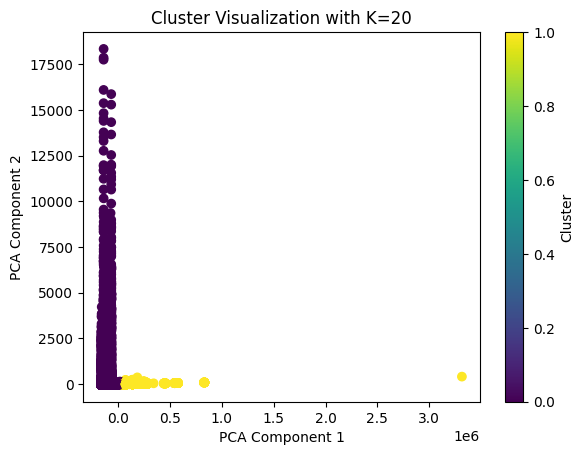

In [102]:
from sklearn.decomposition import PCA
import google.colab.files as files
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ex)

# Fit KMeans with K=20
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(ex)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Cluster Visualization with K=2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")

# Save the plot to a file
plt.savefig('cluster_visualization.png')  # Save the plot before downloading

plt.show()
#files.download('cluster_visualization.png')  # Now download the saved file